# 도커 명령어 정리
- [참조](https://velog.io/@developer_khj/Docker-Quick-Start-%EB%8F%84%EC%BB%A4%EC%9D%98-%EA%B0%9C%EB%85%90%EA%B3%BC-%EB%AA%85%EB%A0%B9%EC%96%B4)

도커를 먼저 실행하고  

In [ ]:
# 이미지 다운로드
docker pull nginx

# 이미지 확인
docker image ls

다음은 이미지가 없어도 내려받아 실행

In [ ]:
docker run -d -it --name nginx_ws -p 80:80 nginx

# docker 실행 서버 확인
docker ps

다음 서버 실행
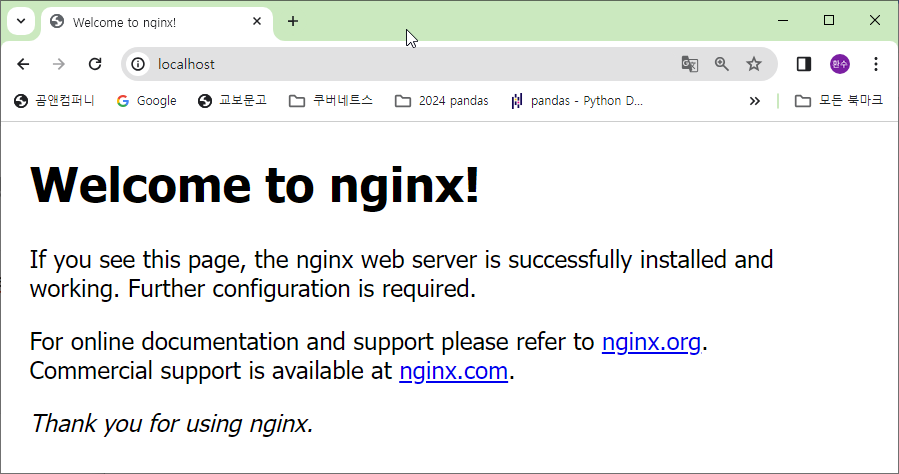

환경 화일을 살펴보자. server 섹션 안쪽에 listen port, server_name을 설정할 수 있고, access log위치, 웹루트는 location에서 path를 지정할 수 있다.

In [ ]:
# 환경파일 위치:  /etc/nginx/conf.d/default.conf 

server {
    listen       80;
    listen  [::]:80;
    server_name  localhost;

    #access_log  /var/log/nginx/host.access.log  main;

    location / {
        root   /usr/share/nginx/html;
        index  index.html index.htm;
    }

    #error_page  404              /404.html;
    
    # redirect server error pages to the static page /50x.html
    error_page   500 502 503 504  /50x.html;
    location = /50x.html {
        root   /usr/share/nginx/html;
    }
}

In [ ]:
환경파일을 수정한 이후 다음의 명령어로 환경파일을 다시 읽어들일 수 있다.
nginx -s reload

docker start x -v D:\Docker\nginx\html:/usr/share/nginx/html -d -p 80:80 nginx

docker run --name nginx-update -v D:\docker\nginx\html:/usr/share/nginx/html -d -p 80:80 nginx

docker rm `docker ps -a -q`

# httpd 에서 점검

[참조](https://m.blog.naver.com/wideeyed/221571561901)

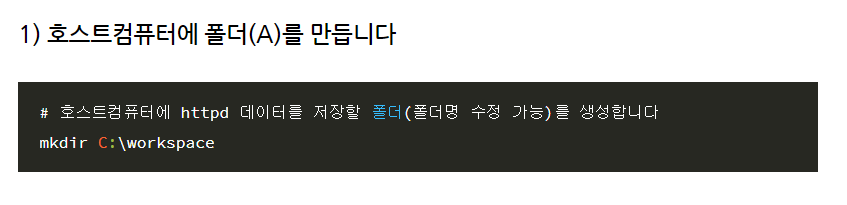

D:\docker\httpd\ws

# 먼저 
docker create -it --name dummy httpd

# 컨테이너 apache2 폴더 데이터를 호스트 컴퓨터 폴더에 복사합니다
docker cp dummy:/usr/local/apache2/ D:\docker\httpd\ws

# 복사 확인

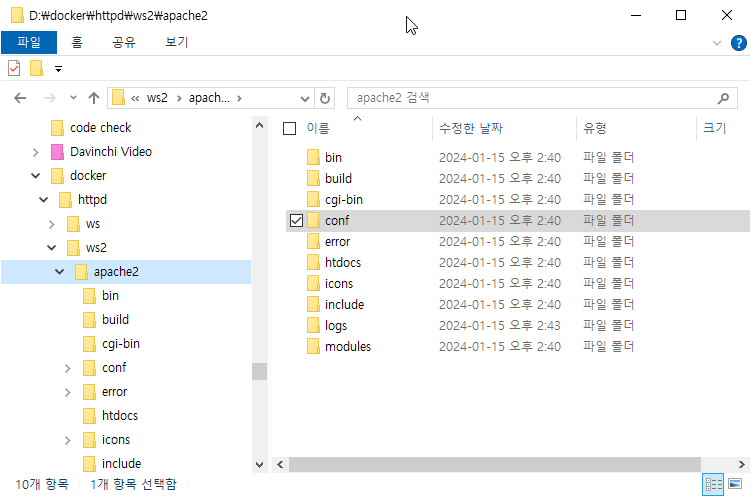

복사한 폴더를 공유해서 컨테이너를 실행

docker run -dit --name httpd1 -p 8881:80 -v D:\docker\httpd\ws\apache2\:/usr/local/apache2/ httpd

다음 폴더와 복사해서 index.html을 수정
D:\docker\httpd\ws2를 다시 만들어서 파일 수정

D:\docker\httpd\ws2\apache2\

# 8882(포트 수정 가능)포트로 컨테이너 1개를 더 실행합니다
docker run -dit --name httpd2 -p 8882:80 -v D:\docker\httpd\ws2\apache2\:/usr/local/apache2/ httpd

## 다음이 잘 안됨

docker create -it --name dummy tomcat:9.0

- 폴더 생성, 파일 생성(index.html)
D:\docker\tomcat\tomcat1\webapps\
<html><body><h1>Hello Tomcat HTTP Server!!!</h1></body></html>

docker cp dummy:/usr/local/tomcat/webapps/ D:\docker\tomcat\tomcat1\
docker rm dummy

docker run -dit --name tomcat1 -p 8080:8080 -v D:\docker\tomcat\tomcat1\webapps\:/usr/local/tomcat/webapps/ tomcat:9.0

docker cp D:\docker\tomcat\tomcat1\webapps\index.html tomcat1:/usr/local/tomcat/webapps

- 들어가서 확인후 나오기(exit)
docker exec -it tomcat1 /bin/bash

- 서버 접속(): 성공/실패


- 폴더 생성, 파일 생성(index.html)
D:\docker\tomcat\tomcat2\webapps\
<html><body><h1>Hello Tomcat Server!!! by kang</h1></body></html>

docker run -dit --name tomcat2 -p 8081:8080 -v D:\docker\tomcat\tomcat2\webapps\:/usr/local/tomcat/webapps/ tomcat:9.0


